# Template

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

In [3]:
def uncert(length:float)->float:
    a,b = 0.3, 0.2 #mm
    return length/100*b + a

print(uncert(200)) #cm

0.7


## Versuch 1 Sammellinse
### Laplace Methode

In [8]:
r_0 = 190 #cm
dg = db = 0.1 #cm

measure1 = [
    ( 5.0,159.2),
    (15.0,158.9),
    (25.0,158.3),
    (35.0,157.4),
    (45.0,156.6),
    (55.0,155.7),
    (65.0,154.4),
    (75.0,152.1),
    (85.0,147.7),
    (90.0,141.2),
    (40.0,157.2)
] 
f1, gs, bs = [], [], []

for s,o in measure1:
    g = r_0 - o
    gs.append(g)

    b = o - s
    bs.append(b)

    l = 1/b + 1/g 
    f1.append(1/l)

bs = np.array(bs)
gs = np.array(gs)
f1 = np.array(f1)

print(bs)
print(gs)
print(f1)

[154.2 143.9 133.3 122.4 111.6 100.7  89.4  77.1  62.7  51.2 117.2]
[30.8 31.1 31.7 32.6 33.4 34.3 35.6 37.9 42.3 48.8 32.8]
[25.67221622 25.57308571 25.60975758 25.74348387 25.70648276 25.58525926
 25.46112    25.40947826 25.25914286 24.9856     25.62773333]


k = -1.087 pm 0.011 cm^-1
d = D1 = 0.0417 pm 0.00031 cm^-1
D2 = 0.0384 pm 0.0007 cm^-1
------------------------------------
f1 = 23.99181608806376 pm 0.18043795869962043
f2 = 26.070243753324814 pm 0.45663533067920237


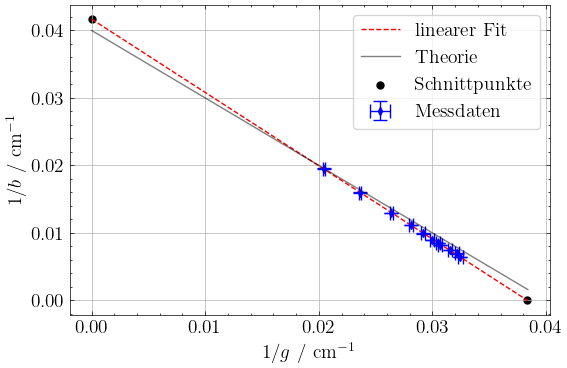

In [14]:
dbinv = 2*db/(bs**2)
dginv = 2*dg/(gs**2)

def ffit(x, k, d):
    return k*x + d

(k,d),pcov = curve_fit(ffit, 1/gs, 1/bs)
dk, dd = np.sqrt(np.diag(pcov))
D2 = -d/k
dD2 = D2*(abs(dd/d) + abs(dk/k))

ginv_fit = np.linspace(0,D2*1.001,1000)
binv_fit = ffit(ginv_fit, k, d)

fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.errorbar(x=1/gs, y=1/bs, xerr=dginv, yerr=dbinv, fmt='d', color='blue', 
                capsize=5, label=r'Messdaten', markersize=4)
ax.plot(ginv_fit, binv_fit, 'r--', label='linearer Fit')
ax.plot(ginv_fit, 0.04-ginv_fit, color='black', linestyle='-', alpha=0.5, label='Theorie')
ax.set_ylabel(r'$1/b$ / $\text{cm}^{-1}$', fontsize=14)
ax.set_xlabel(r'$1/g$ / $\text{cm}^{-1}$', fontsize=14)
ax.scatter([0, D2], [d, 0], 25, 'black', marker='o', label=r'Schnittpunkte')
ax.grid(True)
ax.legend(frameon=True, fontsize=14)


plt.tight_layout()
print(f'k = {k:.3f} pm {dk:.3f} cm^-1')
print(f'd = D1 = {d:.4f} pm {dd:.5f} cm^-1')
print(f'D2 = {D2:.4f} pm {dD2:.4f} cm^-1')
print("------------------------------------")
print(f'f1 = {1/d} pm {dd/(d**2)}')
print(f'f2 = {1/D2} pm {dD2/(D2**2)}')

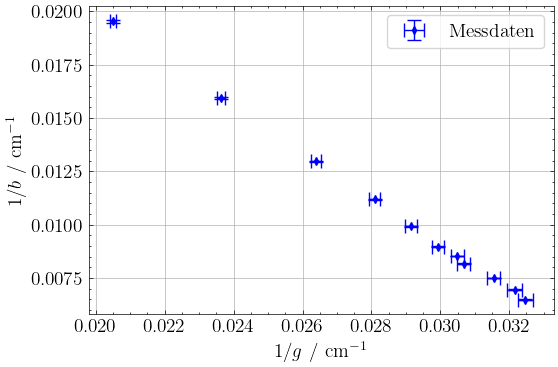

In [10]:
dbinv = 2*db/(bs**2)
dginv = 2*dg/(gs**2)

def ffit(x, k, d):
    return k*x + d

(k,d),pcov = curve_fit(ffit, 1/gs, 1/bs)
dk, dd = np.sqrt(np.diag(pcov))
D2 = -d/k
dD2 = D2*(abs(dd/d) + abs(dk/k))

ginv_fit = np.linspace(0,D2*1.001,1000)
binv_fit = ffit(ginv_fit, k, d)

fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.errorbar(x=1/gs, y=1/bs, xerr=dginv, yerr=dbinv, fmt='d', color='blue', 
                capsize=5, label=r'Messdaten', markersize=4)
# ax.plot(ginv_fit, 0.04-ginv_fit, color='black', linestyle='--', alpha=0.5, label='Theorie')
ax.set_ylabel(r'$1/b$ / $\text{cm}^{-1}$', fontsize=14)
ax.set_xlabel(r'$1/g$ / $\text{cm}^{-1}$', fontsize=14)
ax.grid(True)
ax.legend(frameon=True, fontsize=14)

In [10]:
dfinv = dbinv + dginv
df = dfinv*f1**2
print(f1)
print(df)

df = np.sqrt(np.std(f1)**2/len(measure1) + np.mean(df)**2)
print(np.mean(f1), df)


[25.67221622 25.57308571 25.60975758 25.74348387 25.70648276 25.58525926
 25.46112    25.40947826 25.25914286 24.9856     25.62773333]
[0.14449251 0.14154723 0.13791574 0.1335652  0.12908556 0.12419182
 0.11852442 0.11161921 0.10377469 0.1000576  0.13165938]
25.51212362240482 0.14077203025437926


### Bessel Verfahren

In [4]:
r_0 = 190 #cm

measure2 = [
    (20, 158.4, 49.9),
    (30, 157.6, 60.4),
    (40, 157.3, 71.3),
    (50, 156.1, 82.0),
    (60, 155.1, 93.0)
]
a_s, es = [], []

for s,o1,o2 in measure2:
    a = r_0 - s
    e = o1 - o2


    a_s.append(a)
    es.append(e)

da = de = 0.2
a_s = np.array(a_s)
es = np.array(es)
print(a_s)
print(es)
f = 0.25* (a_s**2 - es**2)/a_s
dfi = 0.25*(a_s**2 + es**2)/(a_s**2)*da + 0.5*es*de/a_s


df = np.sqrt(np.std(f)**2/len(measure2) + np.mean(dfi)**2)
print(np.mean(f), df)


[170 160 150 140 130]
[108.5  97.2  86.   74.1  62.1]
25.175552009265246 0.12472766829883111


## Zerstreulinse
### Methode 1

In [6]:
measure3 = [
    (5, 93.7),
    (15,93.4),
    (25,93.0),
    (35,92.6),
    (45,92.2),
    (55,91.5),
    (65,90.2),
    (70,89.5),
    (30,92.8),
    (10,93.5),
]
bs, g_primes = [], []
db = dg_prime = 0.2

B_prime = 80.9
for rb, rl2 in measure3:
    b = rl2 - rb
    g_prime = rl2 - B_prime
    bs.append(b)
    g_primes.append(-g_prime)
    
bs = np.array(bs)
g_primes = np.array(g_primes)

print(bs)
print(g_primes)

finv = 1/bs + 1/g_primes
dfinv = db/(bs**2) + dg_prime/(g_primes**2)
f = 1/finv
dfi = dfinv*(f**2)

df = np.sqrt(np.std(f)**2/len(measure2) + np.mean(dfi)**2)
print(np.mean(f), df)

[88.7 78.4 68.  57.6 47.2 36.5 25.2 19.5 62.8 83.5]
[-12.8 -12.5 -12.1 -11.7 -11.3 -10.6  -9.3  -8.6 -11.9 -12.6]
-14.86724648887468 0.403090554622154
